In [ ]:
# importing the neccessary libraries

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
mnist = keras.datasets.mnist

In [ ]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print("Training data: {}, {}".format(train_images.shape, train_labels.shape))

11490434/11490434 [==============================] - 0s 0us/step
Training data: (60000, 28, 28), (60000,)


In [ ]:
len(train_images)

60000

In [ ]:
len(test_images)

10000

In [ ]:
len(train_labels)

60000

In [ ]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

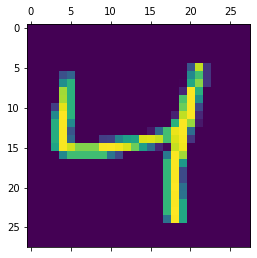

In [ ]:
plt.matshow(train_images[2])

In [ ]:
print("Test data: {}, {}".format(test_images.shape, test_labels.shape))

Test data: (10000, 28, 28), (10000,)


In [ ]:
class_labels = np.unique(train_labels)
print("There are {} classes in the dataset. They are: {}".format(len(class_labels), class_labels))

There are 10 classes in the dataset. They are: [0 1 2 3 4 5 6 7 8 9]


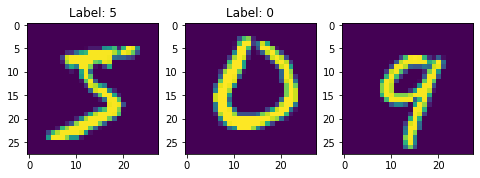

In [ ]:
plt.figure(figsize=(8, 5))
plt.subplot(1,3,1)
plt.imshow(train_images[0])
plt.title("Label: {}".format(train_labels[0]))
plt.subplot(1,3,2)
plt.imshow(train_images[2500])
plt.title("Label: {}".format(train_labels[2500]))
plt.subplot(1,3,3)
plt.imshow(test_images[12])
plt.show()


In [ ]:
# As usual, we scale our dataset to range between 0 and 1. In this dataset, the pixel values 
# Dividing the data by 255 scales to the required range
train_images = train_images / 255.0
test_images = test_images / 255.0

In [ ]:
# Split training data to training and validation sets

x_train = train_images[0:50000]
x_val = train_images[50000:]
y_train = train_labels[0:50000]
y_val = train_labels[50000:]
print("x_train: {}".format(x_train.shape)) # prints x_train: (50000, 28, 28)
print("x_val: {}".format(x_val.shape)) # prints x_val: (10000, 28, 28)
print("y_train: {}".format(y_train.shape)) #prints y_train: (50000,)
print("y_val: {}".format(y_val.shape)) #prints y_val: (10000,)


x_train: (50000, 28, 28)
x_val: (10000, 28, 28)
y_train: (50000,)
y_val: (10000,)


In [ ]:
# Reshape data from 28 * 28 array to a single array

new_dimension = np.prod(train_images.shape[1:])
x_train = x_train.reshape(x_train.shape[0], new_dimension)
x_val = x_val.reshape(x_val.shape[0], new_dimension)
test_images = test_images.reshape(test_images.shape[0], new_dimension)
print("x_train: {}".format(x_train.shape)) #prints x_train: (50000, 784)
print("x_val: {}".format(x_val.shape)) #prints x_val: (10000, 784)
print("test_images: {}".format(test_images.shape)) #prints test_images: (10000, 784)

x_train: (50000, 784)
x_val: (10000, 784)
test_images: (10000, 784)


In [ ]:
# Encode labels to categorical variables
from tensorflow.keras.utils import to_categorical
no_labels = 10
y_train = to_categorical(y_train, no_labels)
y_val = to_categorical(y_val, no_labels)
y_test = to_categorical(test_labels, no_labels)

In [ ]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [ ]:
# Activation functions and Neural Networks hyperparameters
X = tf.placeholder(tf.float32, [None, new_dimension])
Y = tf.placeholder(tf.float32, [None, no_labels])


In [ ]:
# create model architecture
def multilayer_perceptron(x, no_classes, first_layer_neurons=256, second_layer_neurons=128):
 # first layer
 first_weight = tf.Variable(tf.random_uniform([new_dimension, first_layer_neurons]))
 first_bias = tf.Variable(tf.zeros([first_layer_neurons]))
 first_layer_output = tf.nn.relu(tf.add(tf.matmul(x, first_weight), first_bias))

 # second layer
 second_weight = tf.Variable(tf.random_uniform([first_layer_neurons,second_layer_neurons]))
 second_bias = tf.Variable(tf.zeros([second_layer_neurons]))
 second_layer_output = tf.nn.relu(tf.add(tf.matmul(first_layer_output, second_weight), 
 second_bias))

 # output layer
 final_weight = tf.Variable(tf.random_uniform([second_layer_neurons, no_classes]))
 final_bias = tf.Variable(tf.zeros([no_classes]))
 logits = tf.add(tf.matmul(second_layer_output, final_weight), final_bias)
 return logits


In [ ]:
#Call the multilayer perception function
logits = multilayer_perceptron(X, no_labels)
learning_rate = 0.01
#we define the loss and optimiser for the network
loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=Y))
optimiser = tf.train.AdamOptimizer(learning_rate=learning_rate)
train_op = optimiser.minimize(loss_op)


Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [ ]:
#initialise the variables
init = tf.global_variables_initializer()
epochs = 20
batch_size = 1000
iteration = len(x_train) // batch_size

In [ ]:
#train model
with tf.Session() as session:
 session.run(init)
 for epoch in range(epochs):
  average_cost = 0
  start, end = 0, batch_size
  for i in range(iteration):
    batch_x, batch_y = x_train[start: end], y_train[start: end]
    _, loss = session.run([train_op, loss_op], feed_dict={X: batch_x, Y: batch_y})
    start += batch_size
    end += batch_size 
    #average loss
    average_cost += loss/iteration
  print("Epoch========{}".format(epoch))

#evaluate model
 prediction = tf.nn.softmax(logits)
 ground_truth = tf.equal(tf.argmax(prediction, 1), tf.argmax(Y, 1))
 accuracy = tf.reduce_mean(tf.cast(ground_truth, "float"))
 print("Accuracy: {}".format(accuracy.eval({X: test_images, Y: y_test})))


Epoch========0
Epoch========1
Epoch========2
Epoch========3
Epoch========4
Epoch========5
Epoch========6
Epoch========7
Epoch========8
Epoch========9
Epoch========10
Epoch========11
Epoch========12
Epoch========13
Epoch========14
Epoch========15
Epoch========16
Epoch========17
Epoch========18
Epoch========19
Accuracy: 0.920199990272522


In [ ]:
#Optimisation for training deep neural networks
#Building a Sequential Feed Forward Network in Keras
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
model = Sequential()
model.add(Dense(256, activation='relu', input_shape=(new_dimension,)))
model.add(Dense(128, activation='relu'))
model.add(Dense(no_labels, activation='softmax'))
model.compile(optimizer='adam', loss=tf.keras.losses.categorical_crossentropy, 
 metrics=['accuracy'])
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=20, batch_size=1000)
test_loss, test_accuracy = model.evaluate(test_images, y_test)
print('Test loss: {}'.format(test_loss))
print('Test accuracy: {}'.format(test_accuracy))

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 2s 33us/sample - loss: 0.6752 - acc: 0.8194 - val_loss: 0.2563 - val_acc: 0.9290
Epoch 2/20


/usr/local/lib/python3.9/dist-packages/keras/engine/training_v1.py:2333: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


50000/50000 [==============================] - 2s 31us/sample - loss: 0.2325 - acc: 0.9333 - val_loss: 0.1793 - val_acc: 0.9514
Epoch 3/20
50000/50000 [==============================] - 2s 30us/sample - loss: 0.1680 - acc: 0.9516 - val_loss: 0.1449 - val_acc: 0.9595
Epoch 4/20
50000/50000 [==============================] - 2s 38us/sample - loss: 0.1317 - acc: 0.9621 - val_loss: 0.1266 - val_acc: 0.9642
Epoch 5/20
50000/50000 [==============================] - 2s 48us/sample - loss: 0.1060 - acc: 0.9698 - val_loss: 0.1169 - val_acc: 0.9663
Epoch 6/20
50000/50000 [==============================] - 2s 30us/sample - loss: 0.0863 - acc: 0.9756 - val_loss: 0.1031 - val_acc: 0.9696
Epoch 7/20
50000/50000 [==============================] - 2s 31us/sample - loss: 0.0727 - acc: 0.9792 - val_loss: 0.0951 - val_acc: 0.9721
Epoch 8/20
50000/50000 [==============================] - 1s 30us/sample - loss: 0.0624 - acc: 0.9821 - val_loss: 0.0905 - val_acc: 0.9742
Epoch 9/20
50000/50000 [==============

Text(0.5, 1.0, 'Loss Curves - before regularisation')

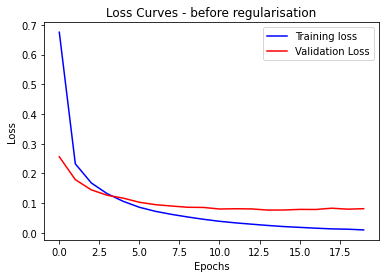

In [ ]:
#Visualize Result
plt.figure()
plt.plot(history.history['loss'], 'blue')
plt.plot(history.history['val_loss'], 'red')
plt.legend(['Training loss', 'Validation Loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curves - before regularisation')

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 2s 39us/sample - loss: 0.9736 - acc: 0.6888 - val_loss: 0.2913 - val_acc: 0.9153
Epoch 2/20
50000/50000 [==============================] - 2s 35us/sample - loss: 0.3777 - acc: 0.8870 - val_loss: 0.2009 - val_acc: 0.9413
Epoch 3/20
50000/50000 [==============================] - 3s 65us/sample - loss: 0.2839 - acc: 0.9165 - val_loss: 0.1641 - val_acc: 0.9511
Epoch 4/20
50000/50000 [==============================] - 2s 40us/sample - loss: 0.2325 - acc: 0.9317 - val_loss: 0.1378 - val_acc: 0.9611
Epoch 5/20
50000/50000 [==============================] - 2s 36us/sample - loss: 0.2005 - acc: 0.9419 - val_loss: 0.1259 - val_acc: 0.9645
Epoch 6/20
50000/50000 [==============================] - 2s 35us/sample - loss: 0.1794 - acc: 0.9475 - val_loss: 0.1147 - val_acc: 0.9678
Epoch 7/20
50000/50000 [==============================] - 2s 36us/sample - loss: 0.1599 - acc: 0.9521 - val_loss: 0.

Text(0.5, 1.0, 'Loss Curves - after regularisation')

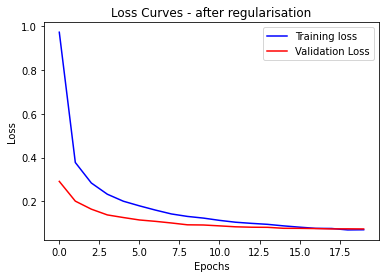

In [ ]:
#Train Again

#Although the validation and training loss seem great, we can see that the validation #loss i
#This identifies overfitting in our network. How do we proceed? #Introduce regularisation to

from tensorflow.keras.layers import Dropout
reg_model = Sequential()
reg_model.add(Dense(256, activation='relu', input_shape=(new_dimension,)))
reg_model.add(Dropout(0.4))
 

reg_model.add(Dense(128, activation='relu'))
reg_model.add(Dropout(0.4))
reg_model.add(Dense(no_labels, activation='softmax'))
reg_model.compile(optimizer='adam', loss=tf.keras.losses.categorical_crossentropy, 
 metrics=['accuracy'])

reg_history = reg_model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=20, batch_size=1000)
test_loss, test_accuracy = reg_model.evaluate(test_images, y_test)
print('Test loss: {}'.format(test_loss))
print('Test accuracy: {}'.format(test_accuracy))

test_loss, test_accuracy = reg_model.evaluate(test_images, y_test)
print('Test loss: {}'.format(test_loss))
print('Test accuracy: {}'.format(test_accuracy))

plt.figure()
plt.plot(reg_history.history['loss'], 'blue')
plt.plot(reg_history.history['val_loss'], 'red')
plt.legend(['Training loss', 'Validation Loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curves - after regularisation')